### `Capture fraction example` .... just now, then  __________ <font color='red'>Delete some staff ____</font>

In [1]:
import os
import sys
from pathlib import Path
from pprint import pformat
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pooch
import scipy.ndimage
import flopy

In [2]:
ws = os.path.join("Beta_temp_out")
if not os.path.exists(ws):
    os.makedirs(ws)

In [3]:
try:
    root = Path(git.Repo(".", search_parent_directories=True).working_dir)
except:
    root = None

In [4]:
data_path = root / ".docs" / "groundwater_paper" if root else Path.cwd()

### `Pre_definitions_IN`

In [5]:
fname = "USPB_capture_fraction_04_01.dat"                 # 
pooch.retrieve(
    url=f"https://github.com/modflowpy/flopy/raw/develop/.docs/groundwater_paper/uspb/results/{fname}",   # IN
    fname=fname,
    path=data_path / "uspb_out" / "results_out",                                                          # OUT  
    known_hash=None,
)

'E:\\15_REPOS\\00_BETAMI\\03_Pyemu\\d_02_groundwater_Capture__W_in_progress_\\uspb_out\\results_out\\USPB_capture_fraction_04_01.dat'

In [6]:
fn = data_path / "uspb_out" / "results_out" / fname                
cf = np.loadtxt(fn)                                        # ______ cf  _______ fn  _______ fname

### ` Just printing`
print(cf.shape)
cf2 = scipy.ndimage.zoom(cf, 4, order=0)
print(cf2.shape)
c = plt.imshow(cf2, cmap="jet")
plt.colorbar(c)

## ` Flopy`______ Large files needed ____ 

###  Check out.____     `  ...\ Beta_temp_outz\DG.nam ____ and others  ___ = ___ a_uspb_Beta.xlsx`

In [9]:
wsl = data_path / ".docs" / "groundwater_paper" / "uspb_prep" / "flopy_prep"    # IN
ml = flopy.modflow.Modflow.load("DG.nam", model_ws=wsl, verbose=False)                 # ml

In [10]:
nlay, nrow, ncol = ml.nlay, ml.dis.nrow, ml.dis.ncol
xmax, ymax = ncol * 250.0, nrow * 250.0

## ` Just ploting figure ___ `
plt.rcParams.update({"font.size": 6})
fig = plt.figure(figsize=(3.25, 4.47))
ax1 = plt.gca()
ax1.set_aspect("equal")
mm1 = flopy.plot.PlotMapView(model=ml, layer=4)
plt.xlim(0, xmax)
plt.ylim(0, ymax)
mm1.plot_inactive(color_noflow="0.75")
c = plt.imshow(cf2, cmap="jet", extent=[0, ncol * 250.0, 0, nrow * 250.0])
cb = plt.colorbar(c, shrink=0.5)
cb.ax.set_ylabel("Layer 4 capture fraction")
mm1.plot_bc(ftype="STR", plotAll=True)

plt.plot(
    [-10000], [-10000], marker="s", ms=10, lw=0.0,
    mec="0.2",
    mfc="white",
    label="Maximum active model extent",)

plt.plot(
    [-10000, 0], [-10000, 0], color="purple", lw=0.75, label="STR reaches (all layers)")

leg = plt.legend(loc="upper left", numpoints=1, prop={"size": 6})
leg.draw_frame(False)
plt.xticks([0, 20000, 40000, 60000, 80000])
plt.tight_layout()
plt.savefig(os.path.join(ws, "Beta_saved_capture_fraction_010y.png"), dpi=300)

### Check out. ___ How :     `  ...\ Beta_temp_outz\DG.nam and others`

In [11]:
ml.change_model_ws(ws)                             # local, ____  ws = os.path.join("Beta_temp_out")
ml.exe_name = "mf2005dbl"
ml.write_input()                                   # write_input
success, buff = ml.run_model(silent=True)                            # ml
assert success, pformat(buff)

# <font color='red'>Delete folders before git commit! ____   * Beta_temp_out    ____</font>

#### __________`E:\15_REPOS\00_BETAMI\03_Pyemu\d_02_groundwater_Capture__W_in_progress_\Beta_temp_out`

#### Delete also `E:\15_REPOS\00_BETAMI\03_Pyemu\d_02_groundwater_Capture__W_in_progress_\.docs\groundwater_paper\uspb_prep`

# `Then ... `  ___  flopy plotting package___fpp__frf___fff

In [12]:
hedObj = flopy.utils.HeadFile(os.path.join(ws, "DG.hds"), precision="double")           # hedObj  
h = hedObj.get_data(kstpkper=(0, 0))                                                    # array h

cbcObj = flopy.utils.CellBudgetFile(os.path.join(ws, "DG.cbc"), precision="double")

frf = cbcObj.get_data(kstpkper=(0, 0), text="FLOW RIGHT FACE")[0]
fff = cbcObj.get_data(kstpkper=(0, 0), text="FLOW FRONT FACE")[0]

qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge((frf, fff, None), ml)

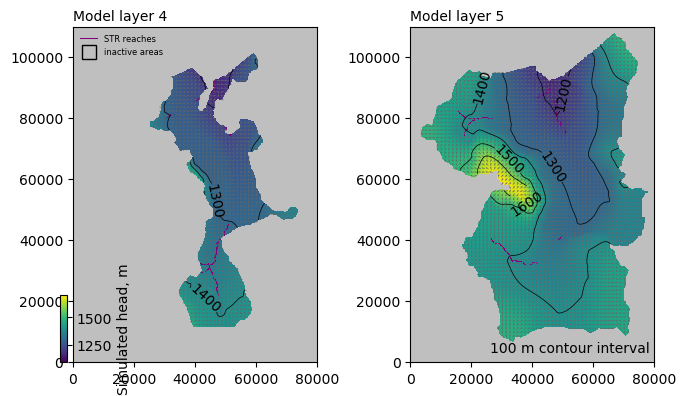

In [15]:
cnt = np.arange(1200, 1700, 100)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.75, 4.47), constrained_layout=True)
ax1.set_xlim(0, xmax)
ax1.set_ylim(0, ymax)
ax2.set_xlim(0, xmax)
ax2.set_ylim(0, ymax)
ax1.set_aspect("equal")
ax2.set_aspect("equal")

mm1 = flopy.plot.PlotMapView(model=ml, ax=ax1, layer=3)                    # mm1
h1 = mm1.plot_array(h, masked_values=[-888, -999], vmin=1100, vmax=1700)
mm1.plot_inactive(color_noflow="0.75")
mm1.plot_bc(ftype="STR")

q1 = mm1.plot_vector(qx, qy, istep=5, jstep=5,                             # Groundwater-flow directions __ plot 5x5
    normalize=True,
    color="0.4",
    scale=70,
    headwidth=3,
    headlength=3,
    headaxislength=3,
)
c1 = mm1.contour_array(
    h, masked_values=[-888, -999], colors="black", levels=cnt, linewidths=0.5
)
ax1.clabel(c1, fmt="%.0f", inline_spacing=0.5)

mm2 = flopy.plot.PlotMapView(model=ml, ax=ax2, layer=4)
h2 = mm2.plot_array(h, masked_values=[-888, -999], vmin=1100, vmax=1700)
mm2.plot_inactive(color_noflow="0.75")
mm2.plot_bc(ftype="STR")
q2 = mm2.plot_vector(
    qx,
    qy,
    istep=5,
    jstep=5,
    normalize=True,
    color="0.4",
    scale=70,
    headwidth=3,
    headlength=3,
    headaxislength=3,
)
c2 = mm2.contour_array(
    h, masked_values=[-888, -999], colors="black", levels=cnt, linewidths=0.5
)
ax2.clabel(c2, fmt="%.0f", inline_spacing=0.5)

ax3 = f.add_axes([0.08, 0.125, 0.01, 0.15])
cb = plt.colorbar(h2, cax=ax3)
cb.ax.set_ylabel("Simulated head, m")

ax1.plot([-10000, 0], [-10000, 0], color="purple", lw=0.75, label="STR reaches")
ax1.plot(
    [-10000],
    [-10000],
    marker="s",
    ms=10,
    lw=0.0,
    mec="black",
    mfc="None",
    label="inactive areas",
)
leg = ax1.legend(loc="upper left", numpoints=1, prop={"size": 6})
leg.draw_frame(False)

ax1.text(0.0, 1.01, "Model layer 4", ha="left", va="bottom", transform=ax1.transAxes)
ax2.text(
    0.98,
    0.02,
    "100 m contour interval",
    ha="right",
    va="bottom",
    transform=ax2.transAxes,
)
ax2.text(0.0, 1.01, "Model layer 5", ha="left", va="bottom", transform=ax2.transAxes)

plt.savefig(os.path.join(ws, "uspb_heads.png"), dpi=300)

In [16]:
fname = "USPB_capture_fraction_04_10.dat"                # ADD WELL
pooch.retrieve(
    url=f"https://github.com/modflowpy/flopy/raw/develop/.docs/groundwater_paper/uspb/results/{fname}",
    fname=fname,
    path=data_path / "uspb" / "results",
    known_hash=None,
)
fn = data_path / "uspb" / "results" / fname
cf = np.loadtxt(fn)
cf2 = scipy.ndimage.zoom(cf, 4, order=0)

SHA256 hash of downloaded file: fb4a90166a01a27e239decd126cd08468959c322c2e4ece11ae674648bd3b482
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


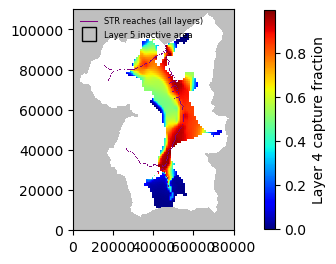

In [21]:
fig = plt.figure(figsize=(3.25, 4.47), constrained_layout=True)
ax1 = plt.gca()
ax1.set_aspect("equal")
mm1 = flopy.plot.PlotMapView(model=ml, layer=4)
plt.xlim(0, xmax)
plt.ylim(0, ymax)

mm1.plot_inactive(color_noflow="0.75")
c = plt.imshow(cf2, cmap="jet", extent=[0, ncol * 250.0, 0, nrow * 250.0])
cb = plt.colorbar(c, shrink=0.5)
cb.ax.set_ylabel("Layer 4 capture fraction")

mm1.plot_bc(ftype="STR", plotAll=True)
plt.plot([-10000, 0], [-10000, 0],     color="purple", lw=0.75, label="STR reaches (all layers)",)
plt.plot([-10000], [-10000],           marker="s", ms=10, lw=0.0, mec="black", mfc="None", label="Layer 5 inactive area",)

leg = plt.legend(loc="upper left", numpoints=1, prop={"size": 6})
leg.draw_frame(False)
plt.xticks([0, 20000, 40000, 60000, 80000])
plt.savefig(os.path.join(ws, "capture_fraction_100y.png"), dpi=300)